In [40]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines import WeibullAFTFitter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [25]:
df_churn = pd.read_csv("churn.csv")
df_churn.head(10)

,user_id,ptp_months,dead_flag,tenure_month,unsub_flag,ce_score,items_Home,items_Kids,items_Men,items_women,...,acti_men,acti_kids,acti_home,log_acti_time,redeemed_exposed,refer_invite,avg_ip_time_sq,revenue_per_month,open_sent,clicked_sent
0,132069,38,0,44,0,0.307513,52.000,171.000,157.000,197.0,...,0,0,0,4.9698133,0.916667,0.714286,20.867477,680.070455,0.150943,0.0528302
1,132537,14,0,43,0,0.187999,0.001,0.001,4.000,1.0,...,1,0,0,6.74523635,0.000000,0.578947,7191.040000,19.953488,0.141667,0.125
2,141670,27,0,42,0,0.456475,1.000,10.000,0.001,6.0,...,0,0,0,6.021023349,0.000000,0.562500,10816.000000,33.690476,0.337591,0.0821168
3,150730,11,1,41,1,0.436260,0.001,0.001,2.000,29.0,...,0,0,0,3.36729583,0.000000,0.000000,209.620038,105.913171,0,0
4,151717,14,1,41,0,0.615582,0.001,0.001,0.001,11.0,...,0,0,0,4.997212274,0.000000,0.328767,3565.795918,51.365854,0.264113,0.0221774
5,151786,21,0,41,0,0.374587,0.001,0.001,1.000,7.0,...,0,0,0,6.272877007,0.000000,0.666667,11556.250000,9.926829,0.342391,0.46558
6,151797,36,0,41,0,0.445010,4.000,0.001,0.001,43.0,...,0,0,0,4.762173935,1.000000,0.333333,1356.694444,100.207317,0.0487051,0.0626208
7,154366,32,1,40,0,0.573362,11.000,47.000,4.000,30.0,...,0,0,0,4.025351691,0.000000,0.529412,992.250000,135.475000,0.915975,0.217391
8,154420,1,1,40,1,0.177020,0.001,0.001,0.001,2.0,...,0,0,0,2.995732274,0.000000,0.214286,196.000000,0.875000,0,0
9,154735,31,0,40,0,0.515504,0.001,14.000,0.001,1.0,...,0,0,0,5.472270674,1.000000,0.416667,25813.777780,11.925000,0.306358,0.061657


In [26]:
df_churn.describe()

,user_id,ptp_months,dead_flag,tenure_month,unsub_flag,ce_score,items_Home,items_Kids,items_Men,items_women,...,acq_sourceReferral,mobile_site_user,acti_women,acti_men,acti_kids,acti_home,redeemed_exposed,refer_invite,avg_ip_time_sq,revenue_per_month
count,2.149950e+05,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,...,214995.000000,214995.000000,214995.000000,214995.000000,214995.000000,214995.0000,214995.000000,214995.000000,214995.000000,214995.000000
mean,2.154462e+07,6.789265,0.544952,17.062499,0.217033,0.237735,1.373673,1.161666,2.047286,4.705176,...,0.493035,0.058866,0.548199,0.233140,0.118961,0.0997,0.141105,0.262332,12308.438927,44.434598
std,1.400257e+07,7.430057,0.497976,9.267023,0.412226,0.150775,5.078737,5.566076,7.784623,12.213105,...,0.499953,0.235375,0.497673,0.422832,0.323743,0.2996,0.339256,0.416446,33140.238796,111.794101
min,1.320690e+05,1.000000,0.000000,1.000000,0.000000,0.002336,0.001000,0.001000,0.001000,0.001000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,1.066230e+07,1.000000,0.000000,10.000000,0.000000,0.117706,0.001000,0.001000,0.001000,0.001000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1272.111111,5.416667
50%,1.806360e+07,3.000000,1.000000,16.000000,0.000000,0.206566,0.001000,0.001000,0.001000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,10000.000000,14.666667
75%,2.883524e+07,11.000000,1.000000,24.000000,0.000000,0.329692,1.000000,0.001000,1.000000,4.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.500000,10000.000000,41.000000
max,5.717177e+07,38.000000,1.000000,44.000000,1.000000,1.000000,330.000000,498.000000,375.000000,428.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,86.000000,531441.000000,7337.333333


In [27]:
df_churn.shape

(214995, 28)

In [28]:
T = df_churn['ptp_months']
E = df_churn['dead_flag']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 214995 total observations, 97833 right-censored observations>

In [29]:
kmf.survival_function_
kmf.cumulative_density_


,KM_estimate
timeline,
0.0,1.000000
1.0,0.649150
2.0,0.624216
3.0,0.601579
4.0,0.581803
5.0,0.563337
6.0,0.545047
7.0,0.528198
8.0,0.510870


,KM_estimate
timeline,
0.0,0.000000
1.0,0.350850
2.0,0.375784
3.0,0.398421
4.0,0.418197
5.0,0.436663
6.0,0.454953
7.0,0.471802
8.0,0.489130


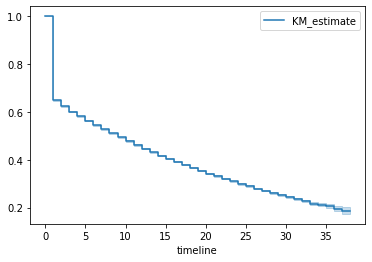

In [30]:
kmf.plot_survival_function()

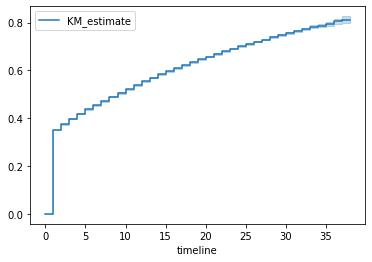

In [31]:
kmf.plot_cumulative_density()

In [32]:
kmf.fit(T, E, timeline=range(0, 100, 2))

kmf.survival_function_   # index is now the same as range(0, 100, 2)
kmf.confidence_interval_ # index is now the same as range(0, 100, 2)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 214995 total observations, 97833 right-censored observations>

,KM_estimate
timeline,
0.0,1.000000
2.0,0.624216
4.0,0.581803
6.0,0.545047
8.0,0.510870
10.0,0.478313
12.0,0.445774
14.0,0.416923
16.0,0.391883


,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
2.0,0.622156,0.626268
4.0,0.579676,0.583924
6.0,0.542859,0.547229
8.0,0.508622,0.513114
10.0,0.475999,0.480623
12.0,0.443383,0.448162
14.0,0.414451,0.419393
16.0,0.389326,0.394438
18.0,0.363897,0.369214


In [33]:
#from lifelines import  CoxPHFitter
#cph = CoxPHFitter()
#cph.fit(df=df_churn, duration_col='ptp_months', event_col='dead_flag')
#cph.print_summary()
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()
print(rossi.head())

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary


   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-03-26 03:03:34 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [34]:
rossi.arrest.value_counts()

0    318
1    114
Name: arrest, dtype: int64

In [35]:
cph.fit_right_censoring

<bound method BaseFitter.fit_right_censoring of <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>>

In [36]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp")
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -668.56
         time fit was run = 2022-03-26 03:03:41 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.69       0.19            -0.75            -0.01                 0.47                 0.99
wexp       -0.59       0.56       0.19            -0.96            -0.22                 0.38                 0.80

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.99   0.05       4.41
wexp          0.00 -3.13 <0.005       9.14
---
Concordance = 0.60
Partial AIC = 1341.12
log-likelihood ratio test = 13.64 on 2 df
-log2(p) of ll-ratio test = 9.84

In [37]:
cph.baseline_hazard_

,baseline hazard
1.0,0.002178
2.0,0.002186
3.0,0.002191
4.0,0.002199
5.0,0.002203
6.0,0.002212
7.0,0.002220
8.0,0.011128
9.0,0.004502
10.0,0.002260


In [23]:
cph.baseline_survival_

,baseline survival
1.0,0.997824
2.0,0.995645
3.0,0.993467
4.0,0.991285
5.0,0.989103
6.0,0.986918
7.0,0.984729
8.0,0.973832
9.0,0.969458
10.0,0.967269


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

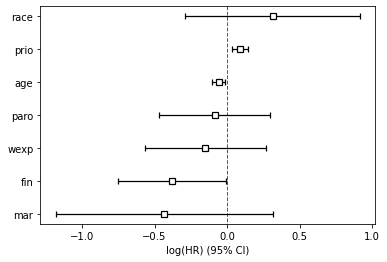

In [38]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.plot()

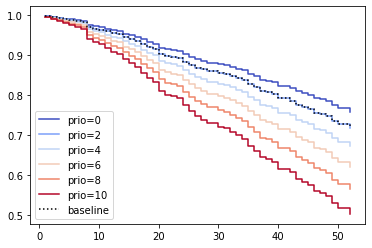

In [39]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

In [48]:
aft = WeibullAFTFitter()
aft.fit(rossi, duration_col='week', event_col='arrest')

aft.print_summary(3)  # access the results using aft.summary


<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -679.917
         time fit was run = 2022-03-26 03:17:50 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age        0.041      1.042      0.016            0.009            0.072                1.009                1.075
        fin        0.272      1.313      0.138            0.002            0.543                1.002                1.720
        mar        0.311      1.365      0.273           -0.224            0.847                0.799                2.332
        paro       0.059      1.061      0.140           -0.215            0.333                0.807                1.394
        prio      -0.066      0.936      0.021           -0.107           -0.025                0.899                0.976
        race      -0.225      0.799      0.220           -0.656            0.207                0.519                1.230
        wexp       0.107      1.112      0.152           -0.190            0.404                0.827                1.497
        Intercept  3.990     54.062      0.419            3.169            4.812               23.777              122.921
rho_    Intercept  0.339      1.404      0.089            0.165            0.514                1.179                1.671

                    cmp to      z       p   -log2(p)
param   covariate                                   
lambda_ age          0.000  2.544   0.011      6.512
        fin          0.000  1.973   0.049      4.365
        mar          0.000  1.139   0.255      1.973
        paro         0.000  0.421   0.674      0.570
        prio         0.000 -3.143   0.002      9.224
        race         0.000 -1.021   0.307      1.703
        wexp         0.000  0.703   0.482      1.053
        Intercept    0.000  9.521 <0.0005     68.978
rho_    Intercept    0.000  3.809 <0.0005     12.807
---
Concordance = 0.640
AIC = 1377.833
log-likelihood ratio test = 33.416 on 7 df
-log2(p) of ll-ratio test = 15.462

In [49]:
np.exp(-0.066)

0.9361308642916188

In [50]:
print(aft.median_survival_time_)
print(aft.mean_survival_time_)

87.74103133261258
103.78671283934625


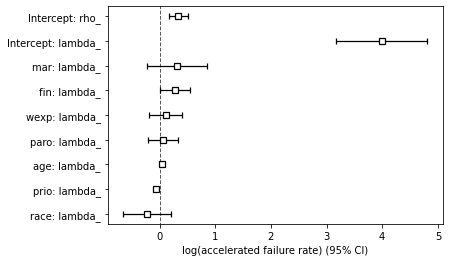

In [51]:
wft = WeibullAFTFitter().fit(rossi, 'week', 'arrest')
wft.plot()